### ***Equipment DownTime***


### ***ACP***


In [2]:
# This is a sample Python script.

# Press Maj+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

import pandas as pd
import numpy as np
import altair as alt
from numpy import linalg as LA
from sklearn import datasets
from sklearn.decomposition import PCA

data= pd.read_csv('Tableau.csv',encoding='ISO-8859-1',sep=";")

Type_de_maintenance= pd.read_csv('Tableau.csv',encoding='ISO-8859-1',sep=";")

Type_de_maintenance = Type_de_maintenance.drop(columns = ["Équipement","Temps d'indisponibilité","Utilisation de l'équipement","Coût total de la maintenance","Dernière maintenance", "Prochaine maintenance","Criticité de l'équipement","Durée d'attente pour la maintenance","Coût d'opportunité"
                             ],axis=1)

data2 = data.drop(columns = ['Équipement',"Type_de_maintenance","Coût total de la maintenance","Dernière maintenance", "Prochaine maintenance","Criticité de l'équipement","Durée d'attente pour la maintenance","Coût d'opportunité"
                             ],axis=1)

Type_de_maintenance = pd.DataFrame(Type_de_maintenance)
species = pd.DataFrame(Type_de_maintenance)

pca = PCA()
pca.fit(data2)
# Calcul de la matrice de covariance
cov_matrix = data2.cov()

# Calcul des vecteurs et valeurs propres de la matrice de covariance
eigen_values, eigen_vectors = LA.eig(cov_matrix)

# Calcul de l'information récupéré en pourcentage sur les 2 premiers axes
info = (eigen_values / sum(eigen_values) * 100).round(2)
axe1_info = info[0]
axe2_info = info[1]

# Projection des points sur les deux premiers vecteurs
projection_matrix = eigen_vectors.T[:][:2].T
data_t = data2.dot(projection_matrix)

# Affichage des nouvelles données à 2 dimensions
data_t.columns = ["axe1", "axe2"]
data_t["species"] = species

alt.Chart(data_t).mark_point().encode(
    x=alt.X("axe1", title=f"axe 1 {axe1_info}%"),
    y=alt.Y("axe2", title=f"axe 2 {axe2_info}%"),
    color="species:N")

alt.Chart(...)

### **Data cleaning**

In [3]:
data['Type_de_maintenance'] = data['Type_de_maintenance'].map({'maintenance corrective':'0','maintenance préventive':'1'},na_action=None)
data

,Équipement,Dernière maintenance,Prochaine maintenance,Type_de_maintenance,Temps d'indisponibilité,Coût total de la maintenance,Utilisation de l'équipement,Criticité de l'équipement,Durée d'attente pour la maintenance,Coût d'opportunité
0,Spectrophotomètre UV,15/01/2022,15/01/2023,1,6,500,100,Équipement critique,2 jours,1000
1,Balance,10/02/2022,10/02/2023,0,2,100,50,Équipement non critique,1 jour,500
2,HPLC,05/03/2022,05/03/2023,1,12,1000,200,Équipement critique,3 jours,1500
3,pH-mètre,20/04/2022,20/04/2023,0,1,50,30,Équipement non critique,2 jours,300
4,Microscope,15/05/2022,15/05/2023,1,8,800,150,Équipement critique,1 jour,800
...,...,...,...,...,...,...,...,...,...,...
135,Centrifugeuse,20/03/2022,20/03/2023,1,1,100,140,Équipement non critique,30 jours,30
136,Réfrigérateur,01/01/2022,01/01/2023,1,2,80,150,Équipement non critique,61 jours,40
137,Congélateur,15/02/2022,15/02/2023,0,24,1200,180,Équipement critique,7 jours,150
138,Pompe à vide,01/04/2022,01/04/2023,1,1,50,180,Équipement non critique,92 jours,10


### ***K-means***

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [5]:
x = data.drop(columns = ['Équipement',"Type_de_maintenance","Temps d'indisponibilité","Dernière maintenance", "Prochaine maintenance","Criticité de l'équipement","Durée d'attente pour la maintenance","Utilisation de l'équipement"],axis=1)
x

,Coût total de la maintenance,Coût d'opportunité
0,500,1000
1,100,500
2,1000,1500
3,50,300
4,800,800
...,...,...
135,100,30
136,80,40
137,1200,150
138,50,10


In [6]:
kmeans = KMeans(3)
kmeans.fit(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
identified_clusters = kmeans.fit_predict(x)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'cluster plot')

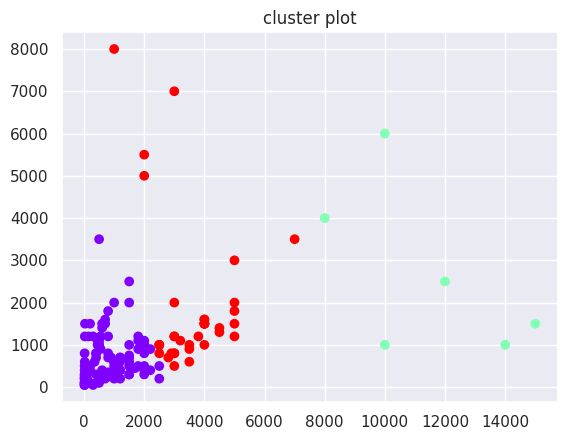

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters["Coût d'opportunité"],data_with_clusters["Coût total de la maintenance"],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.title('cluster plot')

### **Optimal number of clusters**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

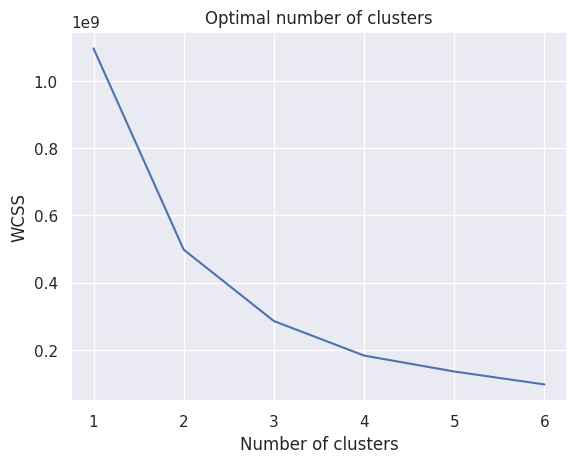

In [9]:
wcss=[]
for i in range(1,7):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('Optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### **Random Forest**


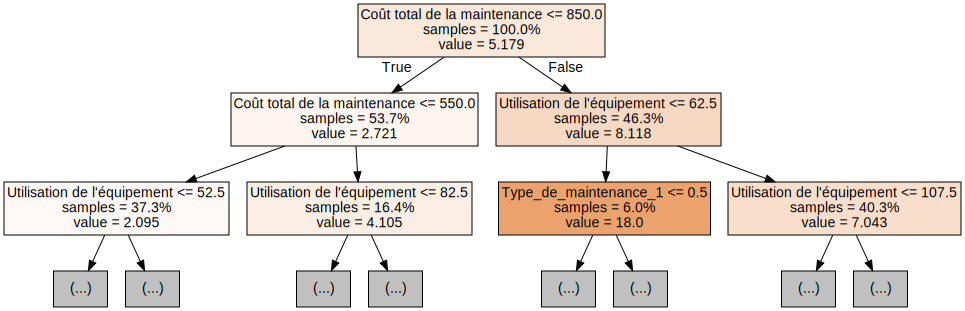

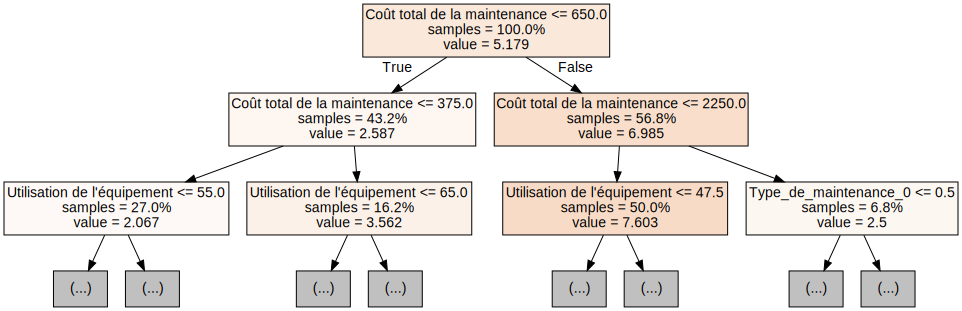

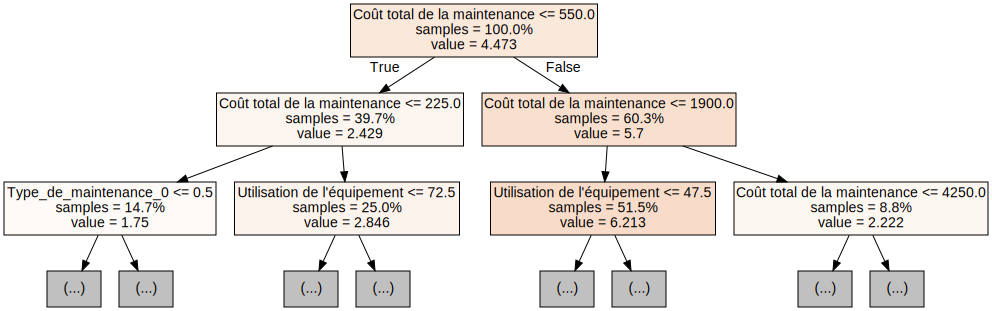

Temps d'indisponibilité prédit pour le nouvel équipement : 19.1


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
# Chargement des données dans un dataframe pandas


# Sélection des variables explicatives et de la variable cible
X = data[['Utilisation de l\'équipement', 'Type_de_maintenance','Coût total de la maintenance']]
y = data['Temps d\'indisponibilité']

# Encodage des variables catégorielles
X = pd.get_dummies(X)

# Division du jeu de données en un ensemble de données d'entraînement et un ensemble de données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialisation et entraînement du modèle de forêt aléatoire
rf = RandomForestRegressor(n_estimators=100, random_state=120)
rf.fit(X_train, y_train)

# Effectuer la prédiction
predicted_y = rf.predict(X_test)


# Export the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

graph.render('mygraph2', format='png')
print("Temps d'indisponibilité prédit pour le nouvel équipement :", predicted_y[0])



### **Decision tree**

5.0


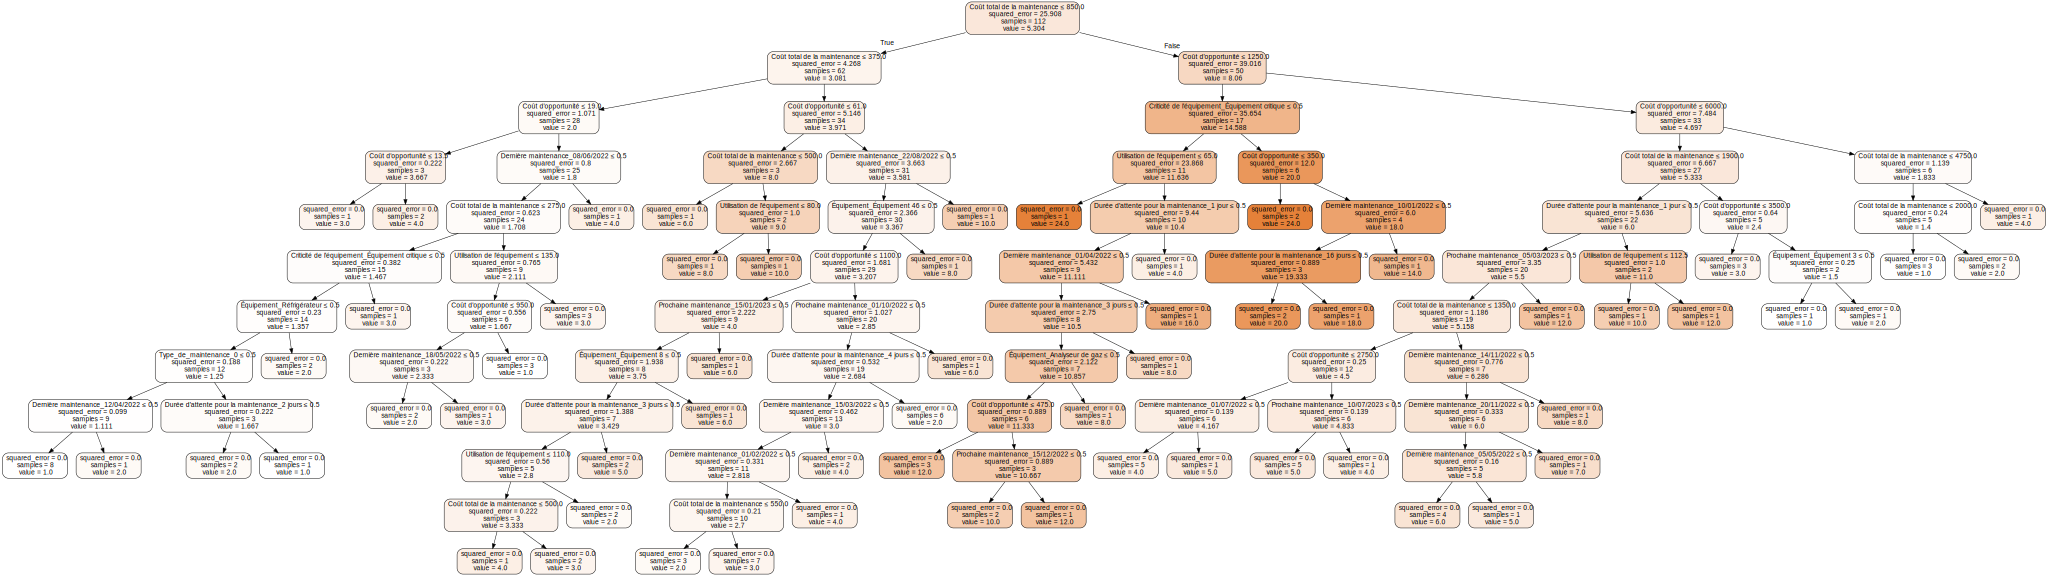

'mygraph.png'

In [13]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz



# Diviser les données en ensembles d'entraînement et de test

X = data.drop("Temps d'indisponibilité", axis=1)
y = data["Temps d'indisponibilité"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement des variables catégorielles en utilisant One-Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Créer un modèle d'arbre de décision
dt = DecisionTreeRegressor(random_state=42)
# Entraîner le modèle
dt.fit(X_train, y_train)

# Faire des prédictions sur le jeu de données de test
y_pred = dt.predict(X_train)
print(y_pred[0])
dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns.tolist(), 
                           class_names=['0', '1'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
display(graph)
graph.render('mygraph', format='png')

### **Employee Satisfaction**


 This code simply reads the data from the CSV file 'Employee-Satisfaction-Index.csv' into a pandas dataframe and prints the first 5 rows of the dataframe

In [15]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('Employee-Satisfaction-Index.csv')

# Print the first 5 rows of the dataframe
print(df.head())

   Unnamed: 0    emp_id  age        Dept location education  \
0           0    HR8270   28          HR   Suburb        PG   
1           1  TECH1860   50  Technology   Suburb        PG   
2           2  TECH6390   43  Technology   Suburb        UG   
3           3   SAL6191   44       Sales     City        PG   
4           4    HR6734   33          HR     City        UG   

     recruitment_type  job_level  rating  onsite  awards  certifications  \
0            Referral          5       2       0       1               0   
1             Walk-in          3       5       1       2               1   
2            Referral          4       1       0       2               0   
3           On-Campus          2       3       1       0               0   
4  Recruitment Agency          2       1       0       5               0   

   salary  satisfied  
0   86750          1  
1   42419          0  
2   65715          0  
3   29805          1  
4   29805          1  


The purpose of the last code was to load the Employee Satisfaction Index dataset into a Pandas DataFrame, remove unnecessary columns and rows, and encode categorical variables using the LabelEncoder from scikit-learn

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Chargement du dataset 
df = pd.read_csv('Employee-Satisfaction-Index.csv')

# Suppression des colonnes inutiles
df = df.drop(columns=['emp_id', 'location', 'education', 'recruitment_type'])

# Suppression des lignes avec des valeurs manquantes
df = df.dropna()

# Encodage des variables catégorielles
encoder = LabelEncoder()
df['Dept'] = encoder.fit_transform(df['Dept'])

# Affichage des 5 premières lignes
print(df.head())

   Unnamed: 0  age  Dept  job_level  rating  onsite  awards  certifications  \
0           0   28     0          5       2       0       1               0   
1           1   50     4          3       5       1       2               1   
2           2   43     4          4       1       0       2               0   
3           3   44     3          2       3       1       0               0   
4           4   33     0          2       1       0       5               0   

   salary  satisfied  
0   86750          1  
1   42419          0  
2   65715          0  
3   29805          1  
4   29805          1  


The code is performing K-means clustering on a dataset to identify clusters associated with higher satisfaction levels. It first creates a K-means object with 3 clusters, fits the K-means model to the data, and then identifies the clusters associated with higher satisfaction levels by calculating the mean satisfaction level for each


In [18]:
from sklearn.cluster import KMeans

# Create K-means object
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit K-means model to data
kmeans.fit(df)

# Identify which clusters are associated with higher satisfaction levels
satisfaction_by_cluster = pd.DataFrame({'cluster': kmeans.labels_, 'satisfaction': df['satisfied']})
satisfaction_by_cluster = satisfaction_by_cluster.groupby('cluster')['satisfaction'].mean().reset_index()
print(satisfaction_by_cluster)


   cluster  satisfaction
0        0      0.518182
1        1      0.515679
2        2      0.563107


Double-cliquez (ou appuyez sur Entrée) pour modifier

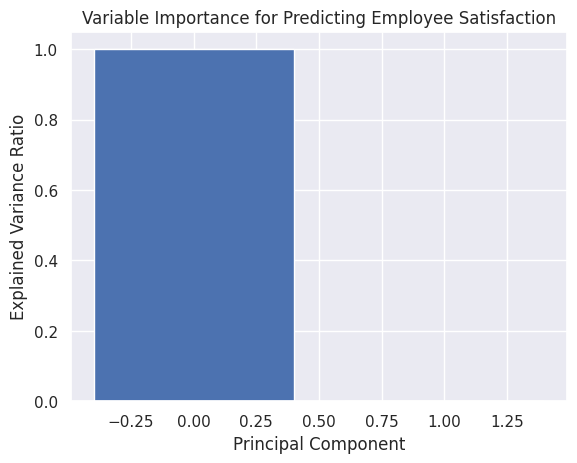

In [19]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# Create PCA object
pca = PCA(n_components=2)

# Apply PCA to data
data_transformed = pca.fit_transform(df)

# Identify most important variables for predicting satisfaction
importance = pca.explained_variance_ratio_

# Create a bar plot of variable importance
plt.bar(range(len(importance)), importance)
plt.title('Variable Importance for Predicting Employee Satisfaction')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

This function computes the correlation matrix of a given DataFrame and creates a heatmap of the matrix using the seaborn library. The heatmap allows for a visual representation of the correlation values between the variables, where darker colors represent stronger correlations and lighter colors represent weaker correlations. The function also includes the option to display the correlation coefficients as annotations within each cell of the heatmap for easy interpretation

The variables that are best represented by C1 and C2 are job_level and rating.
Correlation matrix:


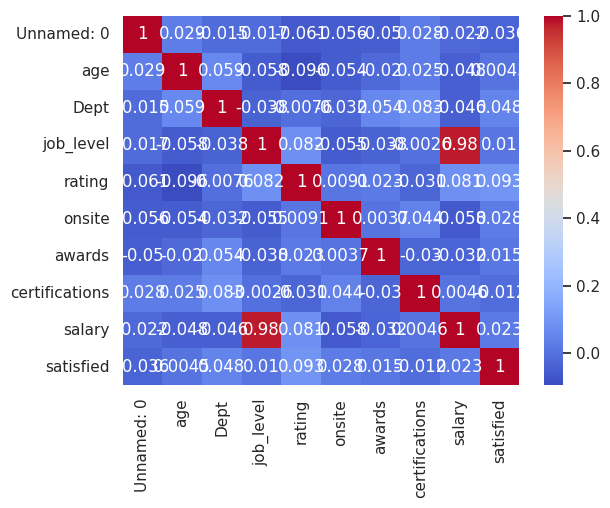

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap of correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Apply PCA to correlation matrix
pca = PCA(n_components=2)
pca.fit(corr_matrix)
transformed_matrix = pca.transform(corr_matrix)

# Identify variables that are best represented by the first two principal components
component1 = pca.components_[0]
component2 = pca.components_[1]

var1 = df.columns[np.argmax(np.abs(component1))]
var2 = df.columns[np.argmax(np.abs(component2))]

# Print results
print("The variables that are best represented by C1 and C2 are {} and {}.".format(var1, var2))
print("Correlation matrix:")
plt.show()

Double-cliquez (ou appuyez sur Entrée) pour modifier

In [21]:
import pandas as pd

def missing_values(df):
    """
    Compute the number and percentage of missing values for each variable in a DataFrame.
    """
    # Compute total number of missing values for each variable
    missing = df.isnull().sum()
    
    # Compute percentage of missing values for each variable
    pct_missing = (missing / len(df)) * 100
    
    # Create DataFrame with missing values and their percentages
    missing_df = pd.DataFrame({'Total missing': missing, '% Missing': pct_missing})
    
    return missing_df
missing_values(df)

,Total missing,% Missing
Unnamed: 0,0,0.0
age,0,0.0
Dept,0,0.0
job_level,0,0.0
rating,0,0.0
onsite,0,0.0
awards,0,0.0
certifications,0,0.0
salary,0,0.0
satisfied,0,0.0


In [22]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Charger les données iris
iris = load_iris()
X = iris.data
y = iris.target

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
precision_kmeans = precision_score(y_test, y_pred_kmeans, average='weighted', zero_division=1)

recall_kmeans = recall_score(y_test, y_pred_kmeans, average='weighted')
f1_kmeans = f1_score(y_test, y_pred_kmeans, average='weighted')

# Regression linéaire
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred_regression = regression.predict(X_test)

y_pred_regression = np.where(y_pred_regression >= 0.5, 1, 0)

accuracy_regression = accuracy_score(y_test, y_pred_regression)
precision_regression = precision_score(y_test, y_pred_regression, average='weighted', zero_division=1)

recall_regression = recall_score(y_test, y_pred_regression, average='weighted')
f1_regression = f1_score(y_test, y_pred_regression, average='weighted')

# ACP
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

clf_pca = DecisionTreeClassifier(random_state=42)
clf_pca.fit(X_train_transformed, y_train)

y_pred_pca = clf_pca.predict(X_test_transformed)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='weighted', zero_division=1)

recall_pca = recall_score(y_test, y_pred_pca, average='weighted')
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

# Afficher les résultats
print("K-means:")
print("Accuracy: {:.2f}%".format(accuracy_kmeans * 100))
print("Precision: {:.2f}%".format(precision_kmeans * 100))
print("Recall: {:.2f}%".format(recall_kmeans * 100))
print("F1-score: {:.2f}%".format(f1_kmeans * 100))

print("\nRegression linéaire:")
print("Accuracy: {:.2f}%".format(accuracy_regression * 100))
print("Precision: {:.2f}%".format(precision_regression * 100))
print("Recall: {:.2f}%".format(recall_regression * 100))
print("F1-score: {:.2f}%".format(f1_regression * 100))

print("\nACP:")
print("Accuracy: {:.2f}%".format(accuracy_pca * 100))
print("Precision: {:.2f}%".format(precision_pca * 100))
print("Recall: {:.2f}%".format(recall_pca * 100))
print("F1-score: {:.2f}%".format(f1_pca * 100))

K-means:
Accuracy: 63.33%
Precision: 83.50%
Recall: 63.33%
F1-score: 51.95%

Regression linéaire:
Accuracy: 63.33%
Precision: 83.50%
Recall: 63.33%
F1-score: 51.95%

ACP:
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%


### **Client Satisfaction**

In [23]:
# !pip install ipython-autotime
# %load_ext autotime

import re
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

!pip install kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pandas as pd
df = pd.read_csv('client.csv',encoding='ISO-8859-1',sep=";")
print(len(df))
df[:5]

105


,Prénom,Nom,Âge,Sexe,Profession,Niveau déducation,Situation familiale,attente,Durée de la consultation,Qualité du service médical,confort,access
0,Jean,Dupont,45,Homme,Ingénieur,Diplôme universitaire,Marié,15,30,8,7,9
1,Marie,Martin,32,Femme,Avocate,Diplôme universitaire,Célibataire,10,20,9,8,7
2,Paul,Durand,55,Homme,Médecin,Diplôme universitaire,Marié,30,45,7,6,8
3,Alice,Lefèvre,27,Femme,Étudiante,Diplôme d'études secondaires,Célibataire,5,15,6,9,6
4,Jeanne,Leroy,62,Femme,Retraitée,Diplôme d'études secondaires,Veuve,20,25,9,10,7


In [39]:
# Null values
df.isna().sum().sum()

0

In [40]:
data = df.copy().drop(
    ['Prénom', 'Nom', 'Profession'], 
    axis=1
    )
for col in data:
  if len(df[col].value_counts()) <= 10:
    px.histogram(df, col, color=col, width=700, height=500).show()
  else:
    px.histogram(df, col, width=700, height=500).show()

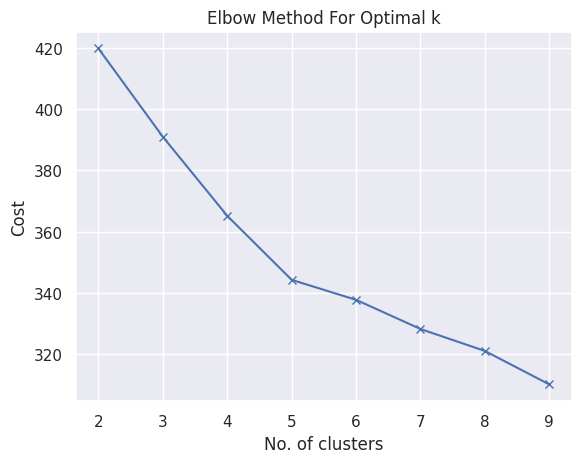

In [41]:
data = df.copy()

# separate numeric and categorical features
num_cols = data.select_dtypes(include=['float', 'int']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# scale the numeric features
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# one-hot encode the categorical features
data_encoded = pd.get_dummies(data[cat_cols])

# merge the numeric and categorical features
data_merged = pd.concat([data[num_cols], data_encoded], axis=1)

# elbow curve to find optimal K
cost = []
K = range(2, 10)
for num_clusters in K:
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', n_init=10, verbose=0, random_state=100)
    kproto.fit(data_merged, categorical=list(range(len(cat_cols))))
    cost.append(kproto.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [42]:
# Cluster the data using K-Prototypes
k_clusters = 3

kproto = KPrototypes(n_clusters=k_clusters, 
                     init="Cao", n_init=5, 
                     verbose=2, 
                     random_state=100)

clusters = kproto.fit_predict(data_merged, categorical=list(range(len(cat_cols))))

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 31, ncost: 393.7856463565293
Run: 1, iteration: 2/100, moves: 0, ncost: 393.7856463565293
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 36, ncost: 408.3302753451284
Run: 2, iteration: 2/100, moves: 8, ncost: 402.9112275990685
Run: 2, iteration: 3/100, moves: 0, ncost: 402.9112275990685
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 30, ncost: 401.5279928894258
Run: 3, iteration: 2/100, moves: 7, ncost: 396.22436714394115
Run: 3, iteration: 3/100, moves: 3, ncost: 393.9755091056426
Run: 3, iteration: 4/100, moves: 0, ncost: 393.9755091056426
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 17, ncost: 396.925

In [43]:
df['Cluster'] = clusters

clusters_count = dict(sorted(dict(df['Cluster'].value_counts()).items()))

for cluster, count in clusters_count.items():
    print(f'Cluster {cluster}: {count} data points')

Cluster 0: 21 data points
Cluster 1: 44 data points
Cluster 2: 40 data points


In [44]:
# Reduce dimentions for visualization
data_2d = TSNE(n_components=2).fit_transform(data_merged)
data_3d = TSNE(n_components=3).fit_transform(data_merged)

<ipython-input-45-691c70414950>:3: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.



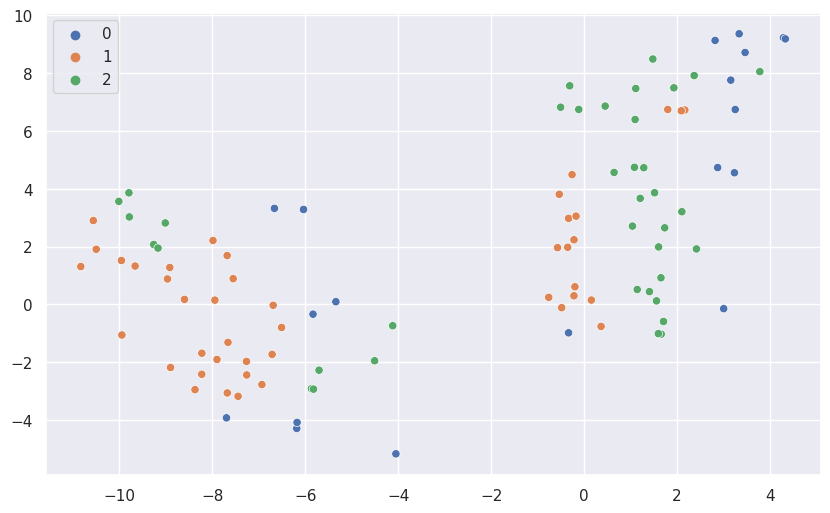

In [45]:
# 2D Scatter
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_2d[:,1], y=data_2d[:,0], hue=clusters, palette=sns.color_palette())
plt.show()

In [46]:
data = df.copy()

# Separate numeric and categorical features
num_cols = data.select_dtypes(include=['float', 'int']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Scale the numeric features
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# One-hot encode the categorical features
data_encoded = pd.get_dummies(data[cat_cols])

data_merged = pd.concat([data[num_cols], data_encoded], axis=1)
data_3d = TSNE(n_components=3).fit_transform(data_merged)
# Cluster the data using K-Prototypes
k_clusters = 3

kproto = KPrototypes(n_clusters=k_clusters, 
                     init="Cao", n_init=5, 
                     verbose=2, 
                     random_state=100)

clusters = kproto.fit_predict(data_merged, categorical=list(range(len(cat_cols))))
# 3D Scatter
# Create a Plotly scatter plot
fig = px.scatter_3d(
    x=data_3d[:,0], y=data_3d[:,1], z=data_3d[:,2],
    color=clusters, opacity=0.7,
    
    hover_data={'Nom': df.Nom,
                'Cluster': clusters}
)

# Customize the plot
fig.update_traces(
    hovertemplate='Employee ID:<br><b>%{customdata[0]}</b><br><br>Cluster:<br><b>%{customdata[1]}</b>',
    marker_size=5,
    )

fig.update_layout(
    title='T-SNE 3D Visualization of Clusters',
    width=800, height=600,
    scene=dict(xaxis=dict(title='X'), yaxis=dict(title='Y'), zaxis=dict(title='Z')),
    showlegend=True
)

# Show the plot
fig.show()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 31, ncost: 393.7856463565293
Run: 1, iteration: 2/100, moves: 0, ncost: 393.7856463565293
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 36, ncost: 408.3302753451284
Run: 2, iteration: 2/100, moves: 8, ncost: 402.9112275990685
Run: 2, iteration: 3/100, moves: 0, ncost: 402.9112275990685
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 30, ncost: 401.5279928894258
Run: 3, iteration: 2/100, moves: 7, ncost: 396.22436714394115
Run: 3, iteration: 3/100, moves: 3, ncost: 393.9755091056426
Run: 3, iteration: 4/100, moves: 0, ncost: 393.9755091056426
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 17, ncost: 396.925

In [47]:
df[df.Nom == 'Dupont']

,Prénom,Nom,Âge,Sexe,Profession,Niveau déducation,Situation familiale,attente,Durée de la consultation,Qualité du service médical,confort,access,Cluster
0,Jean,Dupont,45,Homme,Ingénieur,Diplôme universitaire,Marié,15,30,8,7,9,2
5,Jean,Dupont,45,Homme,Ingénieur,Diplôme universitaire,Marié,15,30,8,7,9,2
31,Sophie,Dupont,33,Femme,Secrétaire,Diplôme d'études secondaires,Marié,15,20,9,8,7,0


In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# the quality of clustring  with silhouette score 
#A silhouette score of 0.313 is moderately good
# assume df is your DataFrame containing the data and the assigned clusters

#used kmeans to see if i will get the sam result that i got with the k-protorypes indeed "yes"
X = df.drop(['Prénom','Nom','Sexe','Profession','Niveau déducation','Situation familiale'], axis=1) # extract the feature matrix
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_
score = silhouette_score(X, labels)
print(f"Silhouette score: {score}")

Silhouette score: 0.31342547008160354


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [50]:
#interpreting clustres
# Select the columns that you want to analyze
columns_to_analyze = ['Âge','attente', 'Durée de la consultation', 'confort', 'access']

# Analyze the mean values of the selected columns for each cluster
cluster_means = df.groupby('Cluster')[columns_to_analyze].mean()

# Print the results
print(cluster_means)

               Âge    attente  Durée de la consultation   confort    access
Cluster                                                                    
0        45.333333  23.571429                 32.380952  7.333333  7.428571
1        35.909091  19.090909                 34.318182  7.613636  7.704545
2        40.850000  19.250000                 37.500000  7.025000  8.250000


1)The first row represents Cluster 0, with an average age of 45.33, an average wait time of 23.57 minutes, an average consultation duration of 32.38 minutes, an average comfort rating of 7.33, and an average access rating of 7.43.

2)The second row represents Cluster 1, with an average age of 35.91, an average wait time of 19.09 minutes, an average consultation duration of 34.32 minutes, an average comfort rating of 7.61, and an average access rating of 7.70.

3)The third row represents Cluster 2, with an average age of 40.85, an average wait time of 19.25 minutes, an average consultation duration of 37.50 minutes, an average comfort rating of 7.03, and an average access rating of 8.25.

In [51]:
# for example cluster 5  : age >35  , travel rarely , Research & Development ,heighst TotalWorkingYears
# for example cluster  : age <35  , travel rarely , Research & Development ,lowest TotalWorkingYears
cluster_id = 2
df[df.Cluster == cluster_id][:5]

,Prénom,Nom,Âge,Sexe,Profession,Niveau déducation,Situation familiale,attente,Durée de la consultation,Qualité du service médical,confort,access,Cluster
0,Jean,Dupont,45,Homme,Ingénieur,Diplôme universitaire,Marié,15,30,8,7,9,2
2,Paul,Durand,55,Homme,Médecin,Diplôme universitaire,Marié,30,45,7,6,8,2
5,Jean,Dupont,45,Homme,Ingénieur,Diplôme universitaire,Marié,15,30,8,7,9,2
7,Paul,Durand,55,Homme,Médecin,Diplôme universitaire,Marié,30,45,7,6,8,2
10,Pierre,Lambert,38,Homme,Infirmier,Diplôme universitaire,Marié,10,30,9,8,8,2


In [52]:
# Calculate the average values of each feature for each cluster
cluster_means.set_index(pd.Index(range(k_clusters)), inplace=True)

# Calculate the number of employees leaving the company in each cluster
confort_count = dict(df.groupby('Cluster').confort.apply(lambda x: (x == 'Yes').sum()).astype(str))
confort_count = {int(k): v for k, v in confort_count.items()} # Convert keys to integers


# Calculate the number of employees in each cluster
clusters_count = dict(df['Cluster'].value_counts())

for cluster in range(k_clusters):
    
    if int(confort_count[cluster]) <  clusters_count[cluster]:
        factors = cluster_means.loc[cluster][['Âge', 'attente', 'Durée de la consultation', 'confort', 'access']]
        if not factors.empty:
            # Develop targeted retention strategies based on the identified factors
            if factors['access'] < 7:
                print(f"For Cluster {cluster}, improving access to the workplace could provide client Satisfaction.")
            if factors['attente'] > 20:
                print(f"For Cluster {cluster}, reducing waiting times could provide client Satisfaction.")
            if factors['Durée de la consultation'] > 35:
                print(f"For Cluster {cluster}, optimizing consultation times could provide client Satisfaction.")
            if factors['confort'] < 7:
                print(f"For Cluster {cluster}, improving comfort levels at work could provide client Satisfaction.")
            if factors['Âge'] < 35:
                print(f"For Cluster {cluster}, offering career development opportunities to increase job engagement and overall satisfaction for younger employees could provide client Satisfaction.")
            else:
                print(f"No factors contributing to client Satisfaction in Cluster {cluster}.")
        else:
            print(f"No factors contributing to  client Satisfaction in Cluster {cluster}.")
    else:
        print(f"Cluster {cluster} has a good  client Satisfaction rate and does not require targeted satisfaction strategies.")

For Cluster 0, reducing waiting times could provide client Satisfaction.
No factors contributing to client Satisfaction in Cluster 0.
No factors contributing to client Satisfaction in Cluster 1.
For Cluster 2, optimizing consultation times could provide client Satisfaction.
No factors contributing to client Satisfaction in Cluster 2.


F1 score: 0.4196078431372549


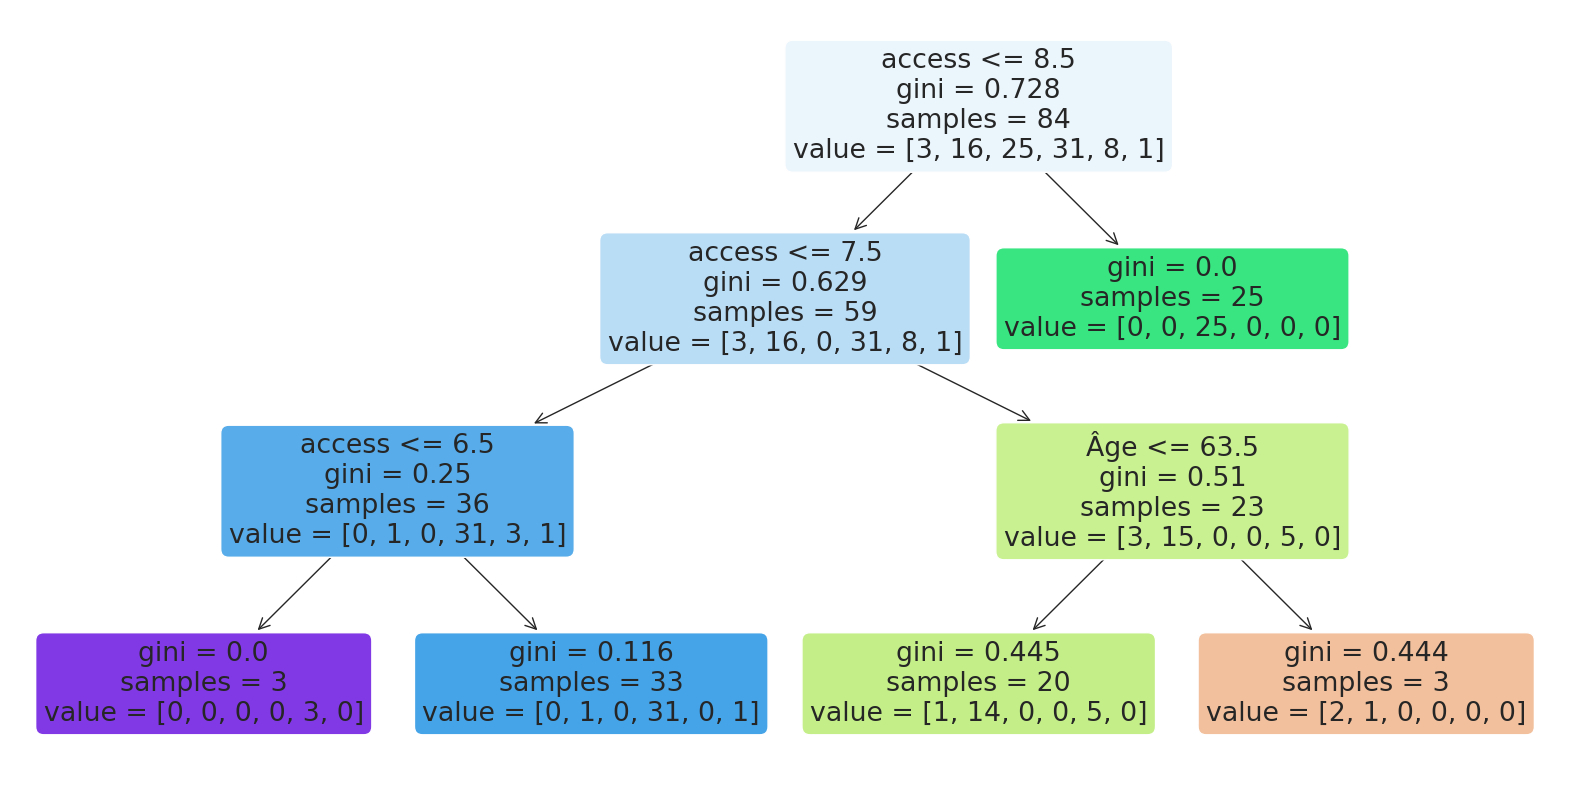

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

columns_to_analyze = ['Âge','attente', 'Durée de la consultation', 'access']

# Extract the columns of interest
df_subset = df[columns_to_analyze + ['confort']]

# Split the data into training and testing sets
X = df_subset.drop('confort', axis=1)
y = df_subset['confort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

# Make predictions on the test set and evaluate f1 score
y_pred = tree_clf.predict(X_test)
print("F1 score:", f1_score(y_test.ravel(), y_pred.ravel(), average='macro'))

plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, rounded=True, feature_names=X.columns)
plt.show()